# Apprentice Chef : Classification using scikit-learn

##### Customer data analysis of the hypothetical company Apprentice Chef
>**Hult International Business School**<br>**Course:** DAT5303 - Machine Learning <br>**Professor:** Chase Kusterer

>**Date:** 02/05/2020<br>**Author:** Arnaldo Vera Gonzalez
 

In [1]:
######################
# IMPORTING PACKAGES #
######################

### Data Science Essentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.ticker import FormatStrFormatter



### ML packages
# Estimators
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder
#Others
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [2]:
########################
# READING FILE & SETUP #
########################

pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 1000)

file = 'Apprentice_Chef_Dataset.xlsx'

original_df = pd.read_excel(file)

In [3]:
print(f"""
Shape of the dataframe:
-----------------------
(#col, #row)
{original_df.shape}
""")


print(f"""
Column(s) with missing values and amount or missing values:
-----------------------------------------------------------
   Column   - #Missing Values
{original_df.isnull().sum().loc[lambda x : x != 0]}""")


Shape of the dataframe:
-----------------------
(#col, #row)
(1946, 29)


Column(s) with missing values and amount or missing values:
-----------------------------------------------------------
   Column   - #Missing Values
FAMILY_NAME    47
dtype: int64


***
We can see that our dataframe has a total of **1946 observations and 29 features (variables)**. Also, the amount of missing values (np.nan) is not very high, as we can only see **47 missing values** from the column FAMILY_NAME. 

We still need to check if there are other types of missing values such as '?', '-', 'NaN', or awkward values that might indicate missing real values. 

In order to do it, we are going to use the methods .info(). This allow us to check the types of the variable. If a feature that should be numerical, appears as an object, it can be an indicative that there are values that doesn't belong to that feature ('?', '-', 'NaN', etc.)


In [4]:
### Calling the info method of the dataframe
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

We can see that we have **3 floats, 22 integers, and 3 objects.** The Object columns are NAME, EMAIL, FIRST_NAME, and FAMILY_NAME. This is a good sign, we know that these 4 features should be objects. We can be sure that there are no characters inside other features. 

***
Let's take a look to the numerical features to check for out of range or numbers with the method .describe(), that might indicate typos, mistakes in gathering the data or other errors. 

## EDA
From the previous table, we can start to see how **some of the variables have uneven distributions.** We can see this looking at how the 25, 50 and 75 quartile values distribute between the min and max values. 

For example, if a max value is relatively far from the 75 percentile, and there's no such difference between the 75 and 50 percentile, it might be an indicative of uneven distribution. 

These variables are:
- RENENUE 
- TOTAL_MEALS_ORDERED
- UNIQUE_MEALS_PUNCH 
- CONTACTS_W_CUSTOMER_SERVICE
- AVG_TIME_PER_SITE_VISIT
- CANCELLATIONS_BEFORE_NOON 
- WEEKLY_PLAN 
- EARLY_DELIVERIES 
- LATE_DELIVERIES 
- AVG_PREP_VID_TIME 
- LARGEST_ORDER_SIZE 
- TOTAL_PHOTOS_VIEWED

Additionally, we can see how the **binomial variables** (those that only take values of 1 or 0) are also **looking good.** Meaning that they don't contain other values different than 1 or 0. 

Let's take a deeper look at the variables with, apparently, uneven distributions:

In [5]:
### Calling the describe method of the dataframe
original_df.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [6]:
# Setting the different types of columns to plot and separete them 

### Continous variables
continous = ['REVENUE',
'AVG_TIME_PER_SITE_VISIT',
'FOLLOWED_RECOMMENDATIONS_PCT',
'AVG_PREP_VID_TIME']


### Discrete Variables
discrete = ['TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'CANCELLATIONS_BEFORE_NOON',
'CANCELLATIONS_AFTER_NOON',
'MOBILE_LOGINS',
'PC_LOGINS',
'WEEKLY_PLAN',
'EARLY_DELIVERIES',
'LATE_DELIVERIES',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED']

### Binomial Variables
binomial = ['CROSS_SELL_SUCCESS',
'MOBILE_NUMBER',
'TASTES_AND_PREFERENCES',
'PACKAGE_LOCKER',
'REFRIGERATED_LOCKER']

# Categorical variables
categorical = [
'NAME',
'EMAIL',
'FIRST_NAME',
'FAMILY_NAME',
'email_type',
'email_extension']

custom_cols = [
'diversity_of_meals',
 'ratio_pc_mobile',
 'total_log_ins',
 'ratio_time_video_page',
# 'avg_price_meal'
] 

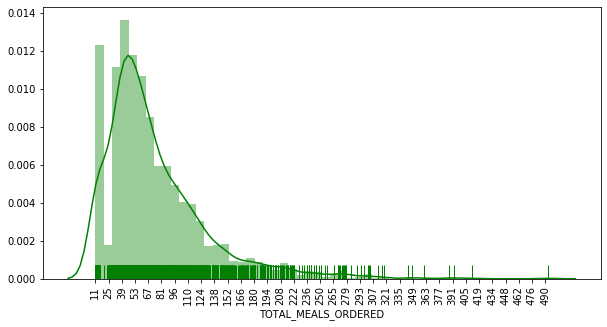

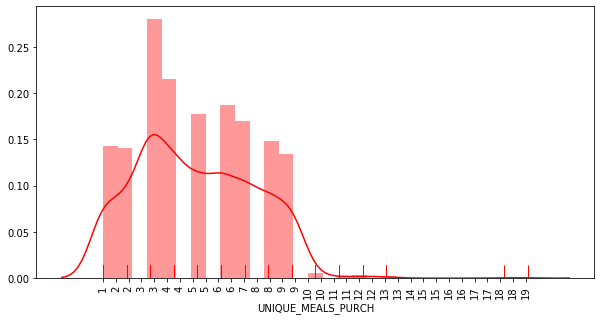

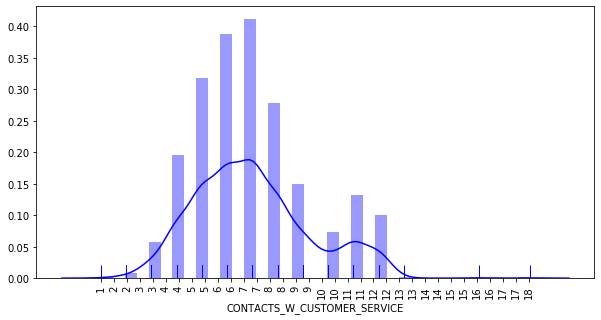

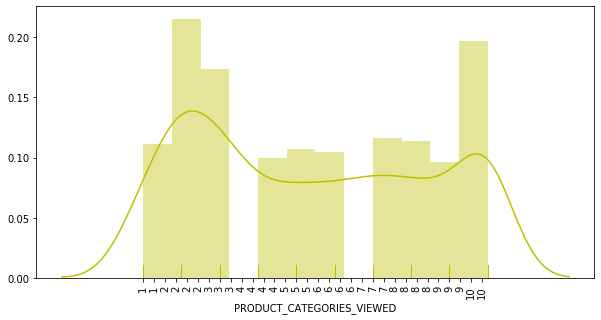

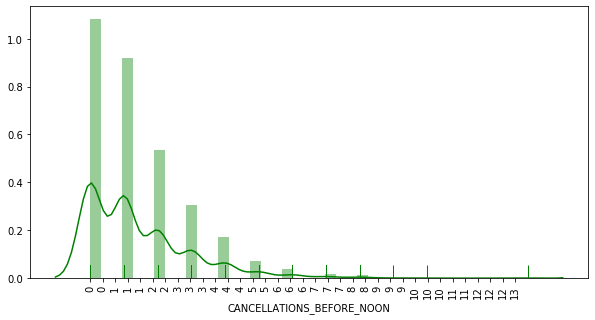

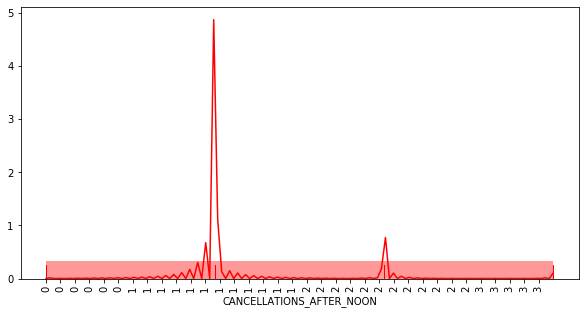

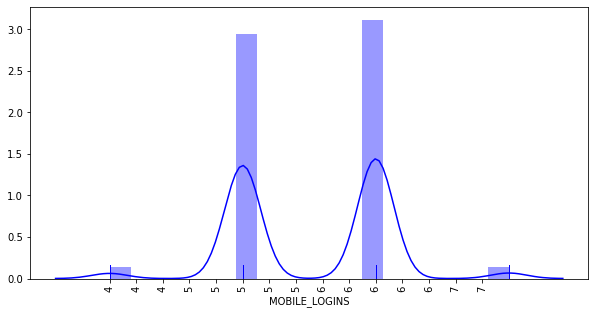

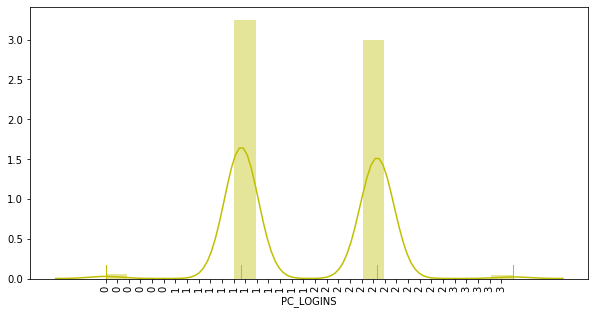

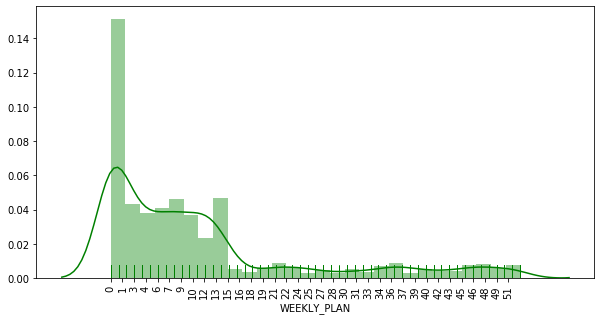

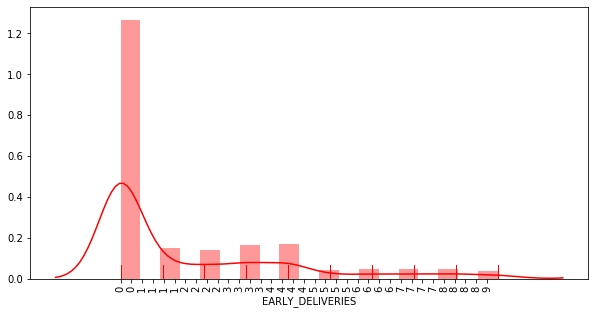

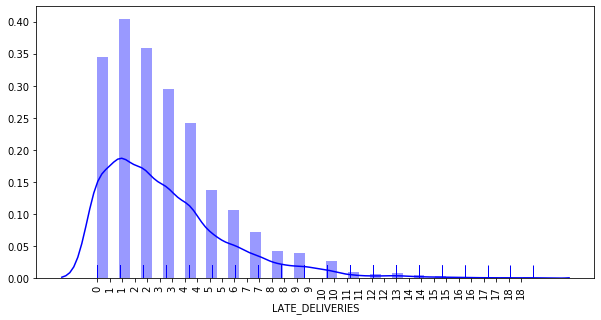

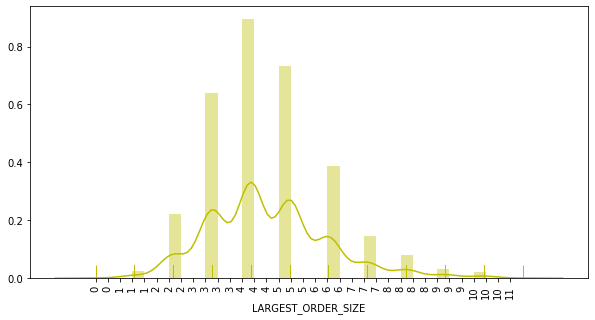

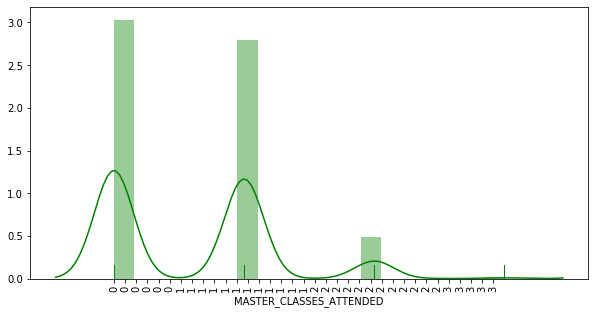

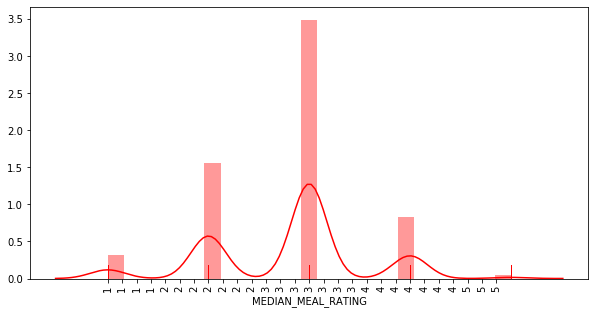

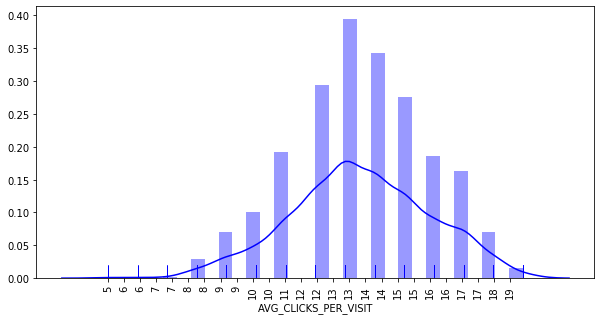

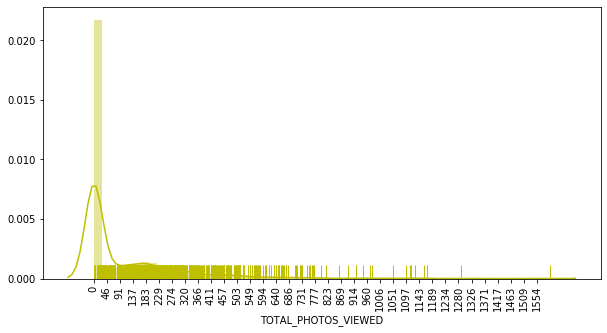

In [7]:
############################
# VISUAL EDA               #
# FEATURES LOOKING UNEVEN  #
############################

#List of columns we want to iterate and plot
apparetnly_uneven = [         
                    'REVENUE',
        'TOTAL_MEALS_ORDERED',
         'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
    'AVG_TIME_PER_SITE_VISIT',
  'CANCELLATIONS_BEFORE_NOON',
                'WEEKLY_PLAN',
           'EARLY_DELIVERIES',
            'LATE_DELIVERIES',
          'AVG_PREP_VID_TIME',
         'LARGEST_ORDER_SIZE',
        'TOTAL_PHOTOS_VIEWED'
]

#List of colors in order to plot each graph differently
colors = ['g', 'r', 'b', 'y']
#Making colors bigger so we don't run out of range
colors = colors * len(discrete) 

#i is the index of apparetnly_uneven list and col is each value inside the list 
for i, col in enumerate(discrete): 
    
    fig, ax = plt.subplots(figsize = (10, 5))
    
    sns.distplot(original_df[discrete][col],
                 kde   = True,
                 bins  = 'fd',
                 rug   = True,
                 color = colors[i])

# making customized ticks and relative to the range of each feature
    ax.xaxis.set_ticks(np.arange( 
        min(original_df[discrete][col]),
        max(original_df[discrete][col]),
        max(original_df[discrete][col])/35))

#rounding the ticks because dividing the max range by 35 gives decimal places 
#using the FormatStrFormatter function from matplotlib
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#rotating the ticks axis to make it easy to plot several numbers simultaneously
    plt.xticks(rotation=90)
    #plt.savefig('distribution_{}.png'.format(apparetnly_uneven[i]))
    plt.show()
    #plt.clf()

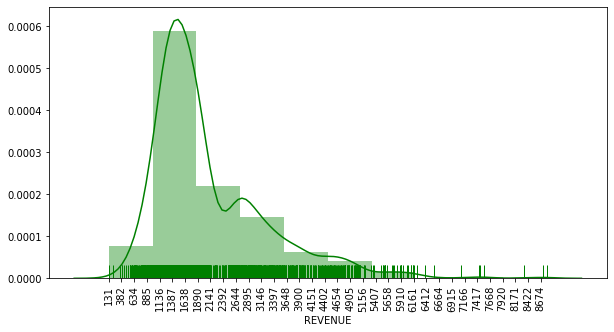

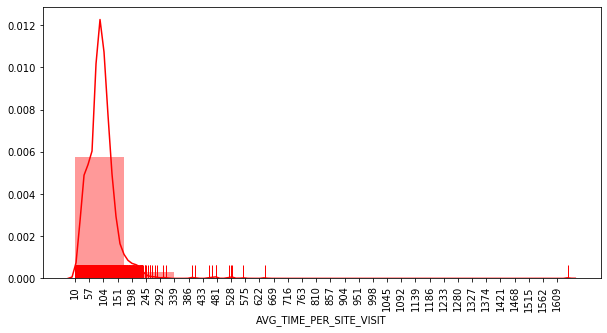

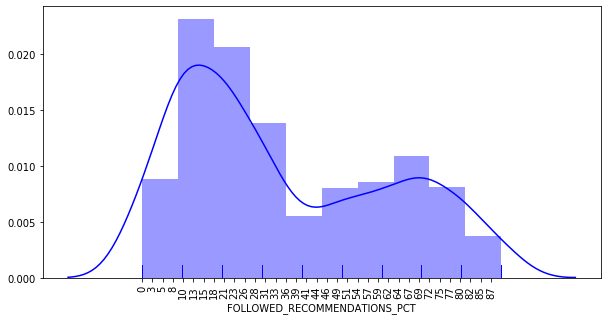

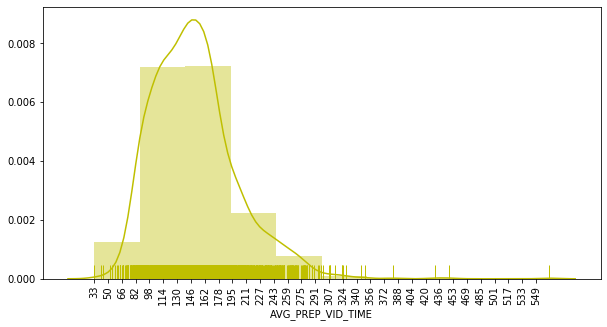

In [8]:
for i, col in enumerate(continous): 
    
    fig, ax = plt.subplots(figsize = (10, 5))
    
    sns.distplot(original_df[continous][col],
                 kde   = True,
                 bins  = 10,
                 rug   = True,
                 color = colors[i])

# making customized ticks and relative to the range of each feature
    ax.xaxis.set_ticks(np.arange( 
        min(original_df[continous][col]),
        max(original_df[continous][col]),
        max(original_df[continous][col])/35))

#rounding the ticks because dividing the max range by 35 gives decimal places 
#using the FormatStrFormatter function from matplotlib
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#rotating the ticks axis to make it easy to plot several numbers simultaneously
    plt.xticks(rotation=90)
    #plt.savefig('distribution_{}.png'.format(apparetnly_uneven[i]))
    plt.show()
    #plt.clf()

In [9]:
r_labels = range(4, 0, -1)
totals_meals_group = pd.qcut(original_df['TOTAL_MEALS_ORDERED'], q = 4, labels = r_labels)
totals_meals_group

0       1
1       3
2       4
3       2
4       2
       ..
1941    4
1942    3
1943    4
1944    4
1945    4
Name: TOTAL_MEALS_ORDERED, Length: 1946, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [10]:
original_df['TOTAL_MEALS_ORDERED'].value_counts()

15     58
13     57
14     54
50     34
40     30
       ..
221     1
228     1
231     1
233     1
493     1
Name: TOTAL_MEALS_ORDERED, Length: 230, dtype: int64

## Feature engineering 
As we can see from the previous plots, some of the distributions were uneven. However, other distributions, simply had big outliers. 
Let's take a look at some examples:

###### Some distributions are clearly uneven, like the distribution of Revenue: 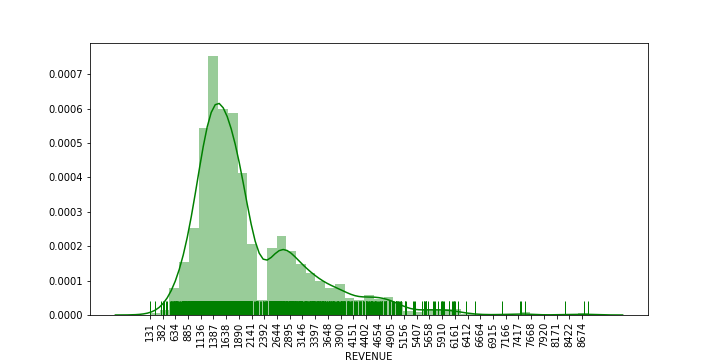
This means, that the distribution we are looking comes from different populations that overlap. This is why we see different slopes and peaks in the data. This is very important to spot.
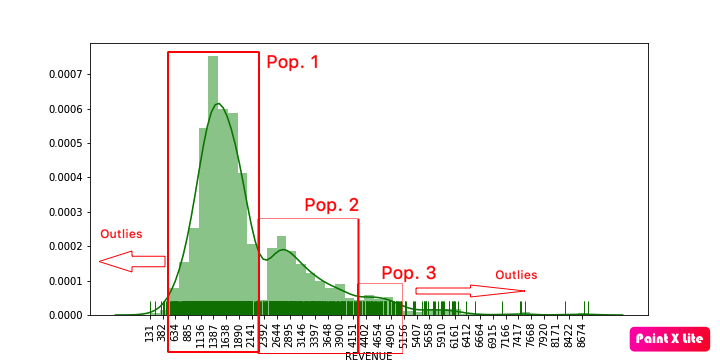

Take a look at the image above, we can see how the revenue splits in tree populations. From the seaborn distplot, there are two things that help identify and separate one population from the other: 
- **The Rug**: Simply put: these are ticks representing where the data lies. The more ticks, the more data there is around that point, indicating a trend or a mode. Where there's a broader separation between the ticks, it might indicate the threshold between one population and the next. 
- **The Distribution and KDE**: It is helpful to take a look at the bars, as wells as the Kernel Density Estimation to see where the peaks and the valleys are. That way we can infere weather a new population exists or it's part of the same population. 
 
***

###### Other distributions are more even, like the distribution of Cancellations before noon: 
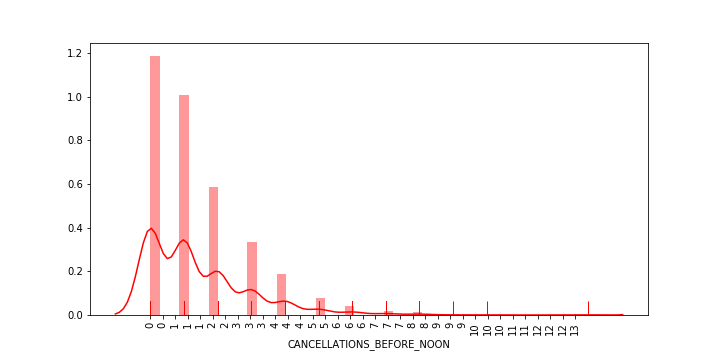
We can see that this distribution is clearly more even and following a Poisson Distribution. In this cases, we are only looking for outliers in order to mark them and let our estimator know that this values after this might be treated differently. In the case of Cancellations before noon, we are probably looking for an outlier threshold of 11 or 12. However, this is decision of each author and you might not want to use any outlier for this specific case.


###### This will be a key part of our analysis and modeling, because if we are able to transmit this information to our estimator, it will perform much better, as it will be able to recognize the different populations. Later on, we will do this by creating dummy variables for each population and outliers.

Looking at the distributions below, we can assign the following thresholds to introduce information to our estimator later on.

In [11]:
##############################################################################
## Assigning Threshold for outliers and populations                         ##
##############################################################################

### Continous variables
revenue_lo = 2300
revenue_mid = 4200
revenue_hi = 5570

av_time_visit_lo = 215
av_time_visit_mid = 378
av_time_visit_hi = 1000

av_time_visit_lo = 215
av_time_visit_hi = 1000

av_prep_vid_time_lo = 240
av_prep_vid_time_hi = 700

#followed_recomendations_lo = 10 
followed_recomendations_hi = 40

### Discrete variables
total_meals_ord_lo = 15
total_meals_ord_hi = 175

contact_w_cust_service_mid = 9

weekly_plan_at = 0
weekly_plan_mid = 14

early_deiveries_at =0

total_photos_viewed_at = 0

df = original_df.copy()

In [12]:

#REVENUE
df['revenue_lo'] = 0
condition = df.loc[0:,'revenue_lo'][df['REVENUE'] < revenue_lo]
df['revenue_lo'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

df['revenue_mid'] = 0
condition = df.loc[0:,'revenue_mid'][revenue_lo <= df['REVENUE']][df['REVENUE']<= revenue_mid]
df['revenue_mid'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

df['revenue_hi'] = 0
condition = df.loc[0:,'revenue_hi'][revenue_hi < df['REVENUE']]
df['revenue_hi'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

df['followed_recomendations_hi'] = 0
condition = df.loc[0:,'followed_recomendations_hi'][followed_recomendations_hi <= df['FOLLOWED_RECOMMENDATIONS_PCT']]
df['followed_recomendations_hi'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

df['weekly_plan_mid'] = 0
condition = df.loc[0:,'weekly_plan_mid'][weekly_plan_at < df['WEEKLY_PLAN']][df['WEEKLY_PLAN']< weekly_plan_mid]
df['weekly_plan_mid'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

#TOTAL_MEALS_ORDERED
df['total_meals_ord_lo'] = 0
condition = df.loc[0:,'total_meals_ord_lo'][df['TOTAL_MEALS_ORDERED'] <= total_meals_ord_lo]
df['total_meals_ord_lo'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

df['total_meals_ord_hi'] = 0
condition = df.loc[0:,'total_meals_ord_hi'][total_meals_ord_hi <= df['TOTAL_MEALS_ORDERED']]
df['total_meals_ord_hi'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

#AVG_TIME_PER_SITE_VISIT
df['av_time_visit_lo'] = 0
condition = df.loc[0:,'av_time_visit_lo'][df['AVG_TIME_PER_SITE_VISIT'] < av_time_visit_lo]
df['av_time_visit_lo'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

df['av_time_visit_mid'] = 0
condition = df.loc[0:,'av_time_visit_mid'][av_time_visit_lo <= df['AVG_TIME_PER_SITE_VISIT']][df['AVG_TIME_PER_SITE_VISIT']<= av_time_visit_mid]
df['av_time_visit_mid'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

df['av_time_visit_hi'] = 0
condition = df.loc[0:,'av_time_visit_hi'][av_time_visit_hi < df['AVG_TIME_PER_SITE_VISIT']]
df['av_time_visit_hi'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

## Custom features
After giving to our dataframe the information of the different populations and outliers we can combine two or more features together to ad value to our model. 
The decision of which features to combine and how to combine them is a combination of industry knowledge, experience and intuition. 

In our analysis, we will create 5 new features that might give our model a better approach to the data. The new features are:

- **Diversity of meals:** Will tell us how relatively varied is our customer compared to the rest of the customers. It will be the division between **UNIQUE_MEALS_PURCH** and **TOTAL_MEAL_ORDERED**. It is possible that we observe a relation in revenue between customers that prefer a bunch if known meals, against the ones that prefer diversity. 


- **Average price of meal:** We have the total number of meals ordered(**TOTAL_MEALS_ORDERED**), and the total amount of money spent on the meals(**REVENUE**). Therefore, we can calculate how much, on average, each customer spends per meal by dividing them.


- **Ratio PC/Mobile logins:** It might be a relation between the revenue spent by someone and how much they log-in in the mobile compared to the pc. For example, more PC log ins can indicate a customers spending more time at home, or older customers. On the other hand, more mobile log ins might indicate a younger and busier person, who might spend more on Apprentice Chef.


- **Total Logins:** Similar to the example before, the total amount of Logins can indicate a customer with several devices, that can have a relation with the revenue due to a busier schedule and therefore more money spent in the company.


- **Ratio of video consumption/time on the page:** Customers spending more time looking at the cooking videos than browsing through the site, might indicate that they are more engaged and therefore spend more money.

Let's create them:

In [13]:
### 
# CREATING NEW VARIABLES
###

df['diversity_of_meals'] = df['UNIQUE_MEALS_PURCH']/df['TOTAL_MEALS_ORDERED']

df['avg_price_meal'] = df['REVENUE']/df['TOTAL_MEALS_ORDERED']

df['ratio_pc_mobile'] = df['PC_LOGINS']/df['MOBILE_LOGINS']

df['total_log_ins'] = df['PC_LOGINS'] + df['MOBILE_LOGINS']

df['ratio_time_video_page'] = df['AVG_PREP_VID_TIME']/ df['AVG_TIME_PER_SITE_VISIT']

df['bowsing speed'] = df['AVG_TIME_PER_SITE_VISIT']/df['PRODUCT_CATEGORIES_VIEWED']

df['bowsing speed_2'] = df['AVG_CLICKS_PER_VISIT']/df['PRODUCT_CATEGORIES_VIEWED']

df['meals_eaten'] = df['TOTAL_MEALS_ORDERED'] - df['CANCELLATIONS_BEFORE_NOON']

df['real_av_price_meal'] = df['REVENUE']/df['meals_eaten']

df['weekly_plan-total_meals'] = df['WEEKLY_PLAN']/df['TOTAL_MEALS_ORDERED']



## The marketing team

The marketing team kindly classified the types of email that we might encounter in our dataset between junk, professional and personal email. Let's use their classification and include it in our dataset.

In [14]:
### Email extension lists for classification
personal_extensions = ['gmail.com', 
                       'yahoo.com', 
                       'protonmail.com']

junk_extensions = ['me.com',
                   'aol.com',
                   'hotmail.com',
                   'live.com',
                   'msn.com',
                   'passport.com']

In [15]:
#Creating a new column with the email extension
for value, columns in df['EMAIL'].iteritems():
    df.loc[value ,"email_extension"] = df.loc[value , 'EMAIL'].split('@',1)[1] 
    
#Clasification of the types of email as per marketing classified
for value, columns in df['email_extension'].iteritems():
    
    if df.loc[value, 'email_extension'] in personal_extensions:
        df.loc[value ,"email_type"] = 'Personal'
        
    elif df.loc[value, 'email_extension'] in junk_extensions:
        df.loc[value ,"email_type"] = 'Junk'
        
    else:
        df.loc[value ,"email_type"] = 'Professional'
        
df['email_type'].value_counts()

Personal        861
Professional    696
Junk            389
Name: email_type, dtype: int64

In [16]:
df_enc = pd.get_dummies(df, columns = ['email_type'])

In [17]:
df_enc.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,revenue_lo,revenue_mid,revenue_hi,followed_recomendations_hi,weekly_plan_mid,total_meals_ord_lo,total_meals_ord_hi,av_time_visit_lo,av_time_visit_mid,av_time_visit_hi,diversity_of_meals,avg_price_meal,ratio_pc_mobile,total_log_ins,ratio_time_video_page,bowsing speed,bowsing speed_2,meals_eaten,real_av_price_meal,weekly_plan-total_meals,email_extension,email_type_Junk,email_type_Personal,email_type_Professional
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,1,0,0,1,1,0,0,1,0,0,0.033898,15.932203,0.333333,8,1.927907,17.200000,2.200000,116,16.206897,0.067797,passport.com,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,1,0,0,1,1,0,0,1,0,0,0.068182,33.977273,0.166667,7,1.198248,41.866667,4.333333,44,33.977273,0.181818,jnj.com,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,1,0,1,0,0,0,1,0,0,0.026316,67.697368,0.333333,8,1.717241,19.333333,4.000000,33,77.954545,0.368421,gmail.com,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,1,0,0,1,1,0,0,1,0,0,0.039474,21.671053,0.166667,7,2.746649,4.551000,1.300000,73,22.561644,0.144737,ibm.com,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,1,0,0,1,1,0,0,1,0,0,0.046154,29.584615,0.333333,8,1.276415,11.777778,1.444444,64,30.046875,0.184615,goldmansacs.com,0,0,1


We have 861 personal, 696 professional, and 389 junk emails. It is a very good distribution as any of the emails types is much much likely than the others. 

##### We will use the email classification for our analysis

## Classification of the features

In [18]:
# Setting the different types of columns to plot and separete them 

### Continous variables
continous = ['REVENUE',
'AVG_TIME_PER_SITE_VISIT',
'FOLLOWED_RECOMMENDATIONS_PCT',
'AVG_PREP_VID_TIME']


### Discrete Variables
discrete = ['TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'CANCELLATIONS_BEFORE_NOON',
'CANCELLATIONS_AFTER_NOON',
'MOBILE_LOGINS',
'PC_LOGINS',
'WEEKLY_PLAN',
'EARLY_DELIVERIES',
'LATE_DELIVERIES',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED']

### Binomial Variables
binomial = ['CROSS_SELL_SUCCESS',
'MOBILE_NUMBER',
'TASTES_AND_PREFERENCES',
'PACKAGE_LOCKER',
'REFRIGERATED_LOCKER']

# Categorical variables
categorical = [
'NAME',
'EMAIL',
'FIRST_NAME',
'FAMILY_NAME',
#'email_type',
'email_extension']

custom_cols = [
'diversity_of_meals',
 'ratio_pc_mobile',
 'total_log_ins',
 'ratio_time_video_page',
# 'avg_price_meal'
] 

***
In order to select the model to use in for this analysis, we followed the official sklearn documentation. They have a general cheat-sheet on how to choose which model to use. Available at: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

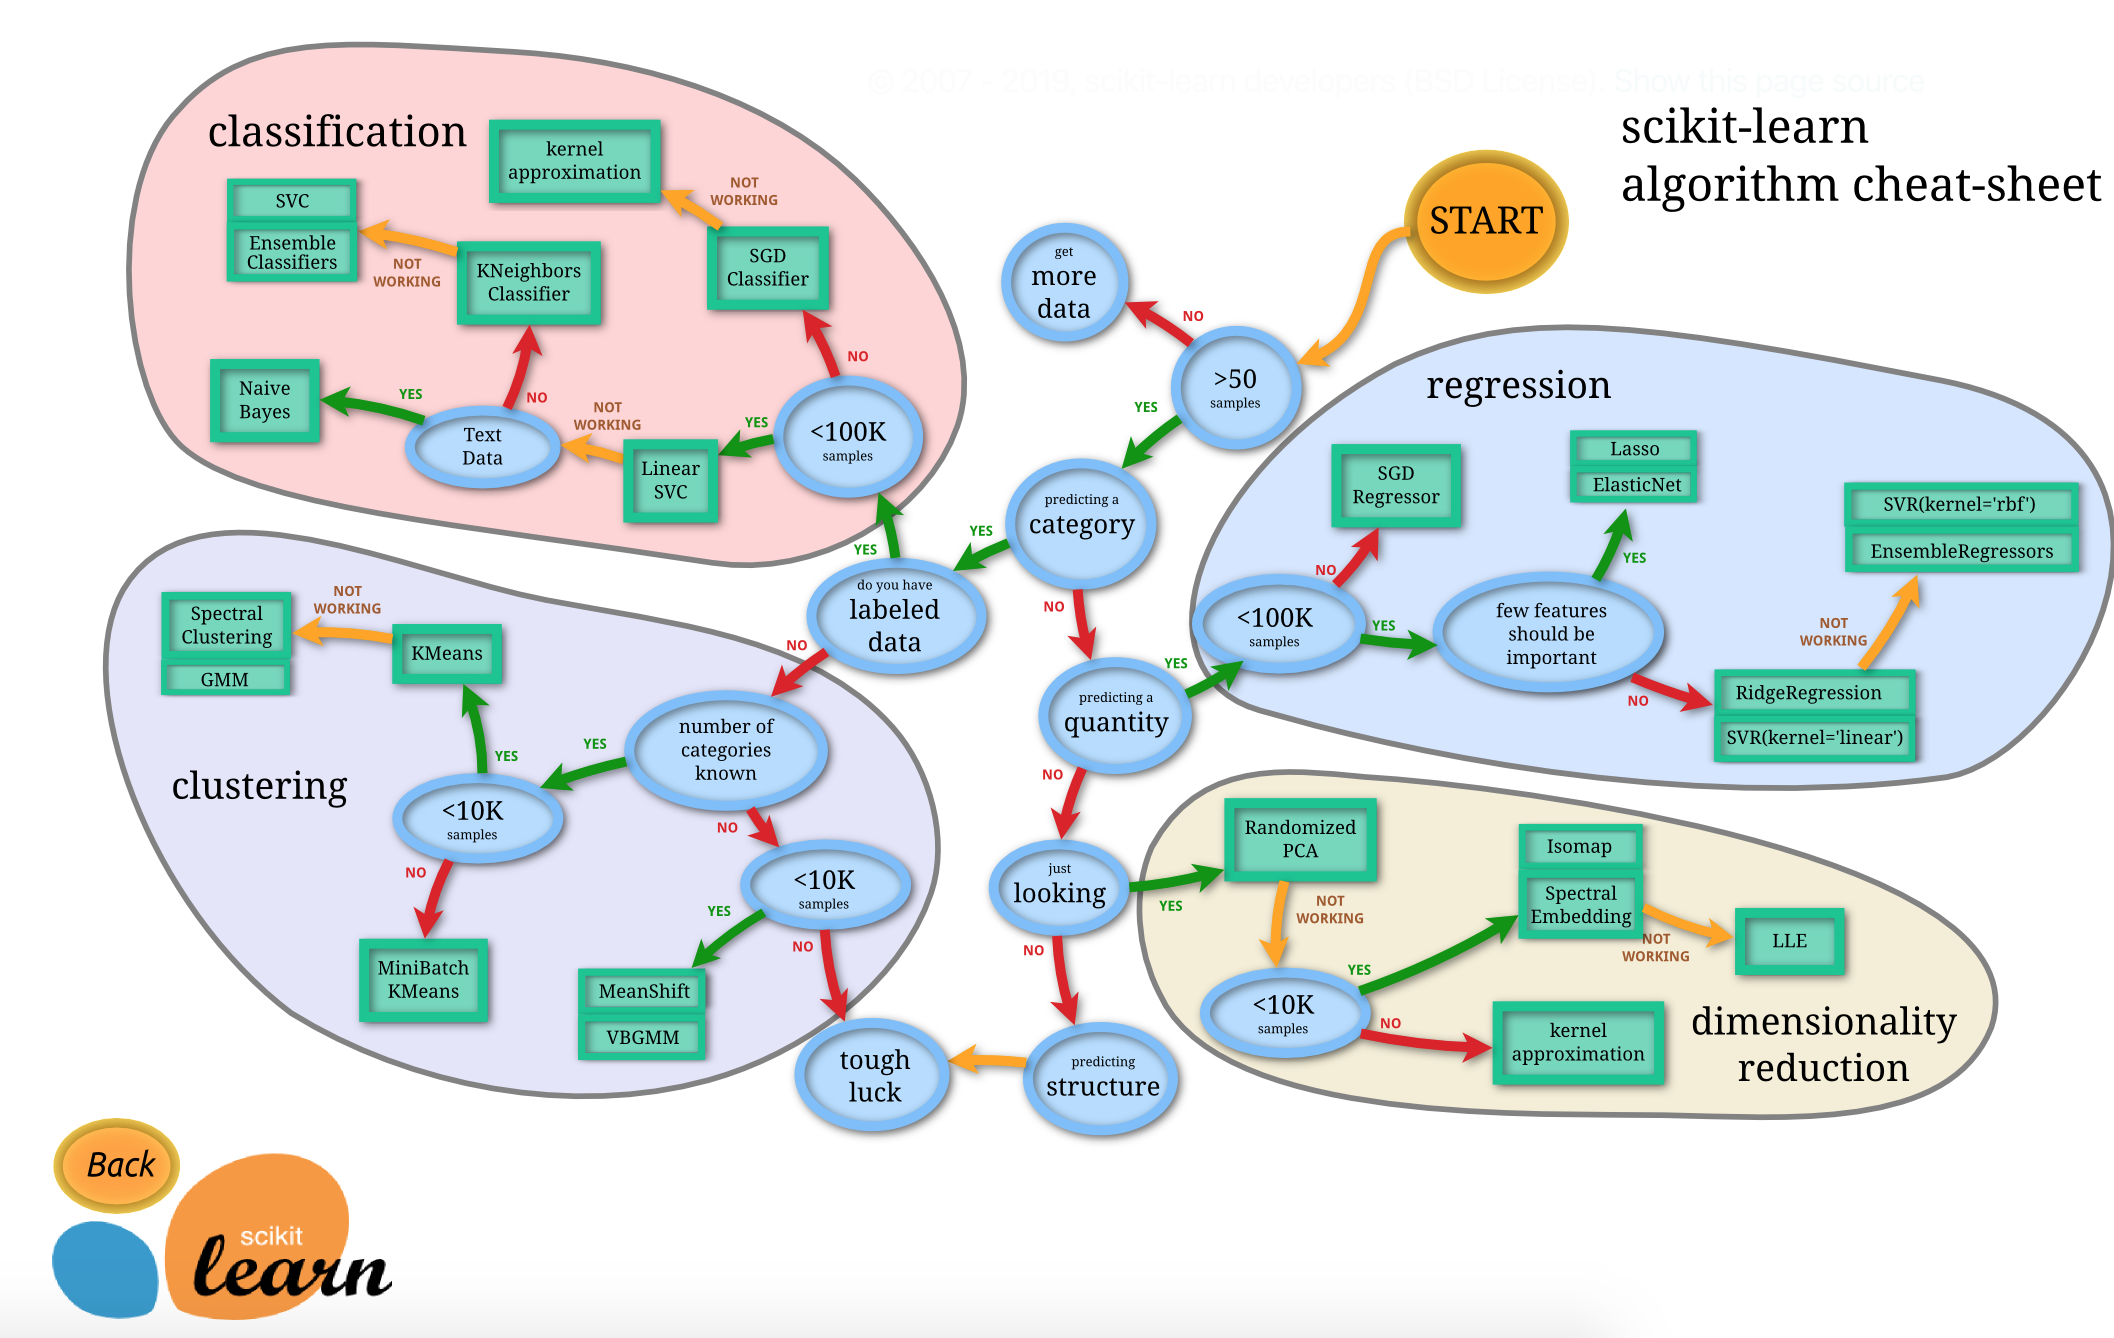

After trying different models, we can see that the best and fastest estimators are either Gradient Boosting Classifier or AdaBoost. ExtraTreesClassifier doesn't seem to keep up compared to the other two. 
In our case, we will use AdaBoost, as it is the best performer in terms of AUC

## Let's predict


In [20]:
file = 'Apprentice_Chef_Dataset.xlsx'

original_df = pd.read_excel(file)

# In[ ]:


################################################################################
# Feature Engineering, Variable Selection and (optional) Dataset Standardization
################################################################################

# use this space for all of the feature engineering that is required for your
# final model

# if your final model requires dataset standardization, do this here as well


##############################################################################
## Assigning Threshold for outliers and populations                         ##
##############################################################################

### Continous variables
revenue_lo = 2300
revenue_mid = 4200
revenue_hi = 5570

av_time_visit_lo = 215
av_time_visit_mid = 378
av_time_visit_hi = 1000

av_time_visit_lo = 215
av_time_visit_hi = 1000

av_prep_vid_time_lo = 240
av_prep_vid_time_hi = 700

#followed_recomendations_lo = 10 
followed_recomendations_hi = 40

### Discrete variables
total_meals_ord_lo = 15
total_meals_ord_hi = 175

contact_w_cust_service_mid = 9

weekly_plan_at = 0
weekly_plan_mid = 14

early_deiveries_at =0

total_photos_viewed_at = 0

df = original_df.copy()


##############################################################################
## Feature Engineering                                                      ##
##############################################################################

#REVENUE
df['revenue_lo'] = 0
condition = df.loc[0:,'revenue_lo'][df['REVENUE'] < revenue_lo]
df['revenue_lo'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

df['revenue_mid'] = 0
condition = df.loc[0:,'revenue_mid'][revenue_lo <= df['REVENUE']][df['REVENUE']<= revenue_mid]
df['revenue_mid'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

df['revenue_hi'] = 0
condition = df.loc[0:,'revenue_hi'][revenue_hi < df['REVENUE']]
df['revenue_hi'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

df['followed_recomendations_hi'] = 0
condition = df.loc[0:,'followed_recomendations_hi'][followed_recomendations_hi <= df['FOLLOWED_RECOMMENDATIONS_PCT']]
df['followed_recomendations_hi'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

df['weekly_plan_mid'] = 0
condition = df.loc[0:,'weekly_plan_mid'][weekly_plan_at < df['WEEKLY_PLAN']][df['WEEKLY_PLAN']< weekly_plan_mid]
df['weekly_plan_mid'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

#TOTAL_MEALS_ORDERED
df['total_meals_ord_lo'] = 0
condition = df.loc[0:,'total_meals_ord_lo'][df['TOTAL_MEALS_ORDERED'] <= total_meals_ord_lo]
df['total_meals_ord_lo'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

df['total_meals_ord_hi'] = 0
condition = df.loc[0:,'total_meals_ord_hi'][total_meals_ord_hi <= df['TOTAL_MEALS_ORDERED']]
df['total_meals_ord_hi'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

#AVG_TIME_PER_SITE_VISIT
df['av_time_visit_lo'] = 0
condition = df.loc[0:,'av_time_visit_lo'][df['AVG_TIME_PER_SITE_VISIT'] < av_time_visit_lo]
df['av_time_visit_lo'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

df['av_time_visit_mid'] = 0
condition = df.loc[0:,'av_time_visit_mid'][av_time_visit_lo <= df['AVG_TIME_PER_SITE_VISIT']][df['AVG_TIME_PER_SITE_VISIT']<= av_time_visit_mid]
df['av_time_visit_mid'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

df['av_time_visit_hi'] = 0
condition = df.loc[0:,'av_time_visit_hi'][av_time_visit_hi < df['AVG_TIME_PER_SITE_VISIT']]
df['av_time_visit_hi'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

### 
# CREATING NEW VARIABLES
###

df['diversity_of_meals'] = df['UNIQUE_MEALS_PURCH']/df['TOTAL_MEALS_ORDERED']

df['avg_price_meal'] = df['REVENUE']/df['TOTAL_MEALS_ORDERED']

df['ratio_pc_mobile'] = df['PC_LOGINS']/df['MOBILE_LOGINS']

df['total_log_ins'] = df['PC_LOGINS'] + df['MOBILE_LOGINS']

df['ratio_time_video_page'] = df['AVG_PREP_VID_TIME']/ df['AVG_TIME_PER_SITE_VISIT']

df['bowsing speed'] = df['AVG_TIME_PER_SITE_VISIT']/df['PRODUCT_CATEGORIES_VIEWED']

df['bowsing speed_2'] = df['AVG_CLICKS_PER_VISIT']/df['PRODUCT_CATEGORIES_VIEWED']

df['meals_eaten'] = df['TOTAL_MEALS_ORDERED'] - df['CANCELLATIONS_BEFORE_NOON']

df['real_av_price_meal'] = df['REVENUE']/df['meals_eaten']

df['weekly_plan-total_meals'] = df['WEEKLY_PLAN']/df['TOTAL_MEALS_ORDERED']


personal_extensions = ['gmail.com', 
                       'yahoo.com', 
                       'protonmail.com']

junk_extensions = ['me.com',
                   'aol.com',
                   'hotmail.com',
                   'live.com',
                   'msn.com',
                   'passport.com']
                   
                   
#Creating a new column with the email extension
for value, columns in df['EMAIL'].iteritems():
    df.loc[value ,"email_extension"] = df.loc[value , 'EMAIL'].split('@',1)[1] 
    
#Clasification of the types of email as per marketing classified
for value, columns in df['email_extension'].iteritems():
    
    if df.loc[value, 'email_extension'] in personal_extensions:
        df.loc[value ,"email_type"] = 'Personal'
        
    elif df.loc[value, 'email_extension'] in junk_extensions:
        df.loc[value ,"email_type"] = 'Junk'
        
    else:
        df.loc[value ,"email_type"] = 'Professional'
        
df['email_type'].value_counts()


df_enc = pd.get_dummies(df, columns = ['email_type'])
#df_enc = pd.get_dummies(df_enc, columns = ['FAMILY_NAME'])
df_enc = pd.get_dummies(df_enc, columns = ['email_extension'])


# Categorical variables
categorical = [
'NAME',
'EMAIL',
'FIRST_NAME',
'FAMILY_NAME',
#'email_extension'
]


X = df_enc.copy()
y = df_enc.copy()
X = X.drop(categorical, axis = 1)
X = X.drop('CROSS_SELL_SUCCESS', axis = 1)

y = y['CROSS_SELL_SUCCESS']

scaler = RobustScaler().fit(X)

scaler.transform(X)
# In[ ]:


################################################################################
# Train/Test Split
################################################################################

# use this space to set up testing and validation sets using train/test split

# Note: Be sure to set test_size = 0.25


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 222)



# In[ ]:


################################################################################
# Final Model (instantiate, fit, and predict)
################################################################################

# use this space to instantiate, fit, and predict on your final model


pipeline = Pipeline(
    [('gbc', AdaBoostClassifier(random_state = 222))]
)

params_gbc = {
    'gbc__learning_rate': [0.007],
    'gbc__n_estimators' : [1000],
    #'gbc__subsample'    : [0.8],
    #'gbc__min_samples_leaf':[390,400,410,420]
}

grid_gbc = GridSearchCV(estimator  = pipeline, 
                        param_grid = params_gbc,
                        cv         = 2,
                        verbose    = 1, 
                        n_jobs     = 3
                        )

grid_gbc.fit(X_train, y_train)
best_hyperparams = grid_gbc.best_params_
print(best_hyperparams)
best_model = grid_gbc.best_estimator_


# In[ ]:


################################################################################
# Final Model Score (score)
################################################################################

# use this space to score your final model on the testing set
# MAKE SURE TO SAVE YOUR TEST SCORE AS test_score
# Example: test_score = final_model.score(X_test, y_test)

train_pred_proba = best_model.predict(X_test)
print('Training Score:', best_model.score(X_train, y_train).round(3))
print('Testing Score:',  best_model.score(X_test, y_test).round(3))
y_pred_proba = best_model.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('AUC Score:', round(adb_clf_roc_auc_score,3))

test_score = best_model.score(X_test, y_test).round(3)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    5.6s finished


{'gbc__learning_rate': 0.007, 'gbc__n_estimators': 1000}
Training Score: 0.814
Testing Score: 0.815
AUC Score: 0.896


Our Final model:

|                | AdaBoost | 
|----------------|------------------------|
| **Training Score** | 0.814                 |
| **Testing Score**  | 0.815                  |
| **AUC Score**     | 0.896                  | 

As we can see, our AUC score is quite high despite the fact we have a not so high Training and Testing scores. This means that our model is pretty good at not missing many Type and and Type 2 errors.  

## Final note to SVM
We also tried using a Suport Vector Machine algorithm as it can be good for these types of classification.
However the default kernel function was not better than a coin toss. After that, we tried with a polynomial function (kernel = 'poly'). This caused the machine to never stop training. 

This was not satisfactory, but it was a great learning since I needed to research about SVM and the types of kernel functions and how they work. 